Requisitos que deben cumplir las gráficas:

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot los quesitos deben tener unos colores diferentes a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

En los pieplot el tamaño de los % tiene que ser de 6.

Ejercicios visualización

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos. 

A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
sns.set_style("whitegrid") # para el fondo de

In [3]:
df_visualizacion=pd.read_csv("df_wd_total_copia.csv")

1.¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

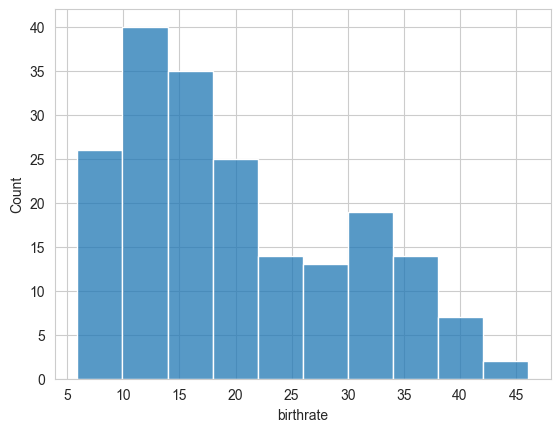

In [4]:
sns.histplot(df_visualizacion, x = "birthrate",bins=10);

#la tasa de natalidad e/ 10-15% representa la mayor frecuencia (hay más países con este índice de natalidad)

2¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

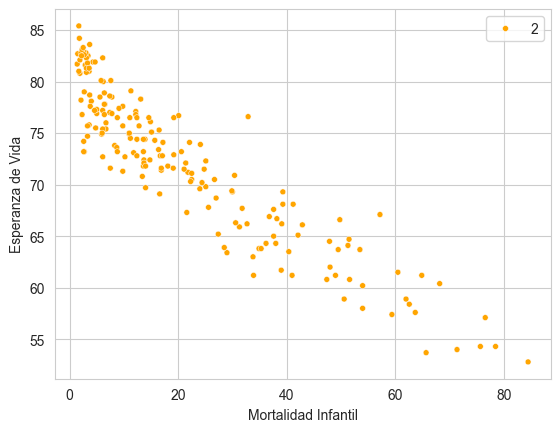

In [5]:
sns.scatterplot(x="infantmortality", y = "lifeexpectancy",data= df_visualizacion, color= "orange",size=2);

plt.xlabel("Mortalidad Infantil");
plt.ylabel("Esperanza de Vida");

#Cuanto menor es la moratlidad infantil (o más cercana a 0) mayor es la esperanza de vida.

3¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [6]:
df_continentes=df_visualizacion.groupby("continent")["country"].count().reset_index()

In [7]:
df_continentes

,continent,country
0,Africa,53
1,Asia,48
2,Europe,44
3,North America,23
4,Oceania,14
5,South America,12
6,Unknown,1


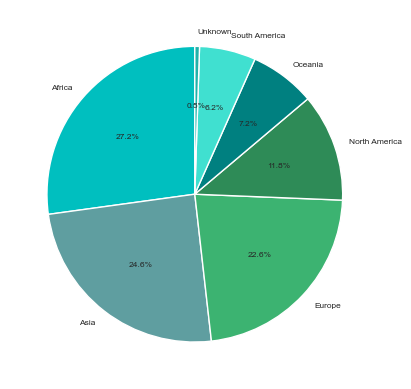

In [8]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie("country",labels="continent",data=df_continentes, autopct="%1.1f%%",colors = colores,textprops={'fontsize': 6},startangle=90);



4¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. s

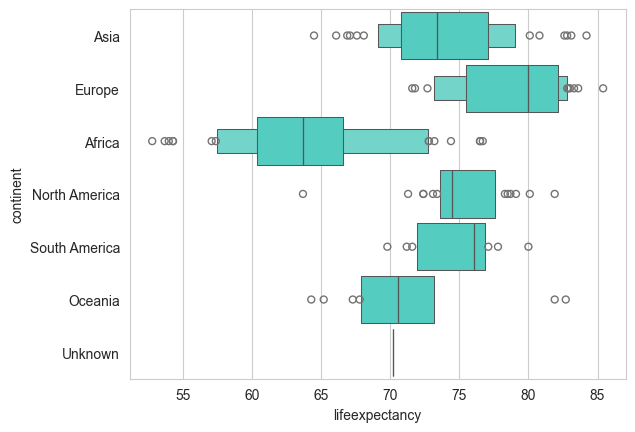

In [9]:
sns.boxenplot(x="lifeexpectancy",y="continent",data=df_visualizacion,width=0.9,color="turquoise");
#la esperanza de vida en el caso de Europa tiene una mediana próxima a 80 de esto 
# se desprende que la población tiene una elevada esperanza de vida. Existen valores atípicos más allá del 75%

5.¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

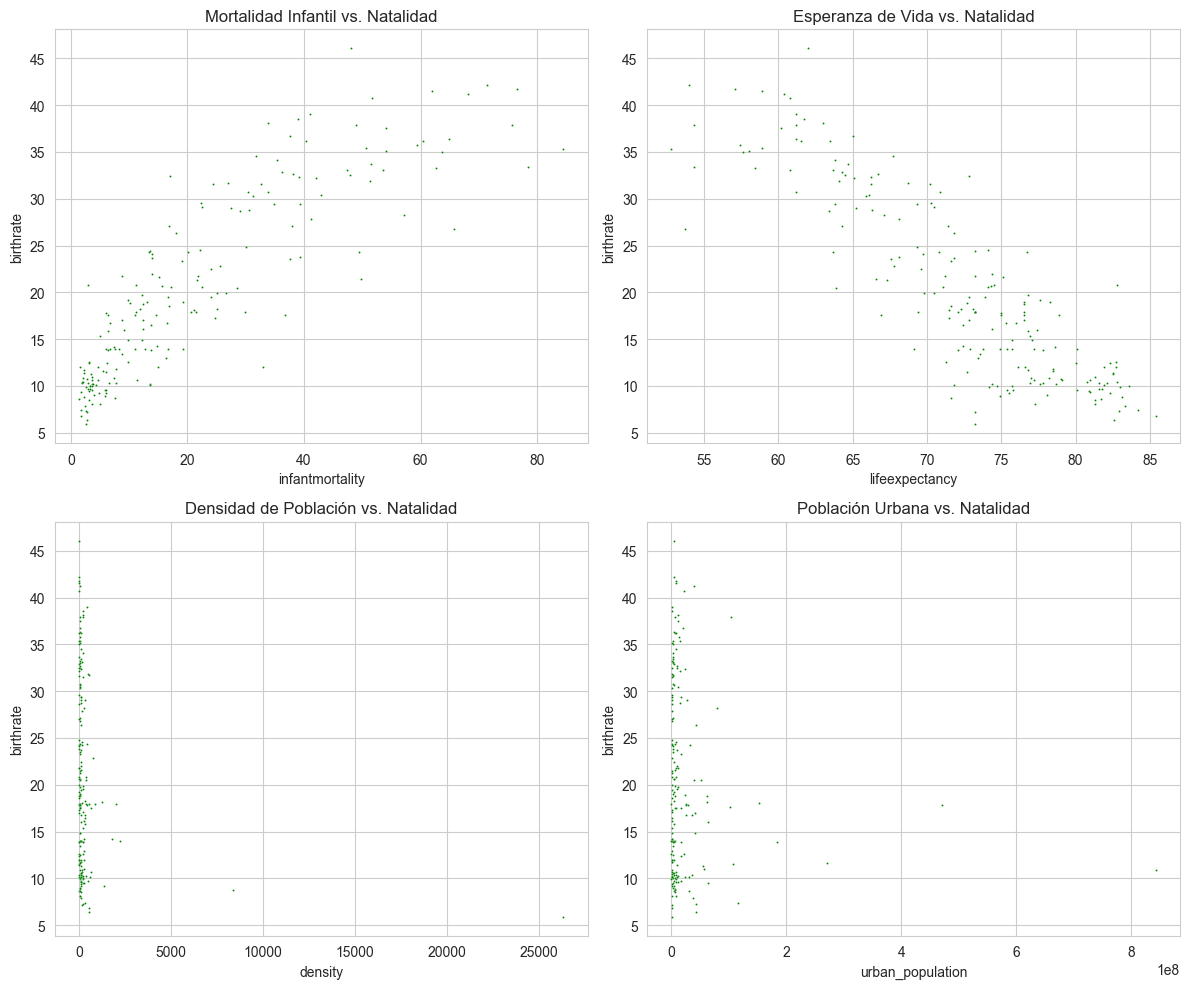

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x="infantmortality", y="birthrate",color='green', data=df_visualizacion, ax=axs[0, 0], s=2)
axs[0, 0].set_title('Mortalidad Infantil vs. Natalidad')
sns.scatterplot(x="lifeexpectancy", y="birthrate",color='green',data=df_visualizacion, ax=axs[0, 1],s=2)
axs[0, 1].set_title('Esperanza de Vida vs. Natalidad')
sns.scatterplot(x="density", y="birthrate",color='green',data=df_visualizacion, ax=axs[1, 0],s=2)
axs[1, 0].set_title('Densidad de Población vs. Natalidad')
sns.scatterplot(x="urban_population", y="birthrate", color='green',data=df_visualizacion, ax=axs[1, 1],s=2)
axs[1, 1].set_title('Población Urbana vs. Natalidad')
plt.tight_layout()
plt.show()

6.¿Cuáles son los 10 países con la mayor área forestal?

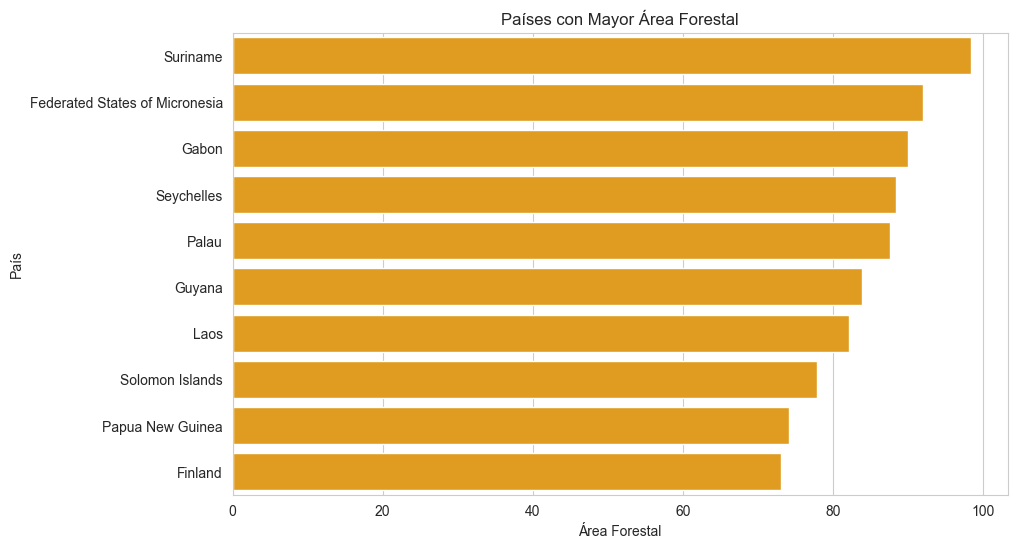

In [15]:
datos_ordenados = df_visualizacion.sort_values(by='forestedarea', ascending=False)

top_10= datos_ordenados.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='forestedarea', y='country', data=top_10, color='orange');
plt.xlabel("Área Forestal")
plt.ylabel("País")
plt.title('Países con Mayor Área Forestal');

7.¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

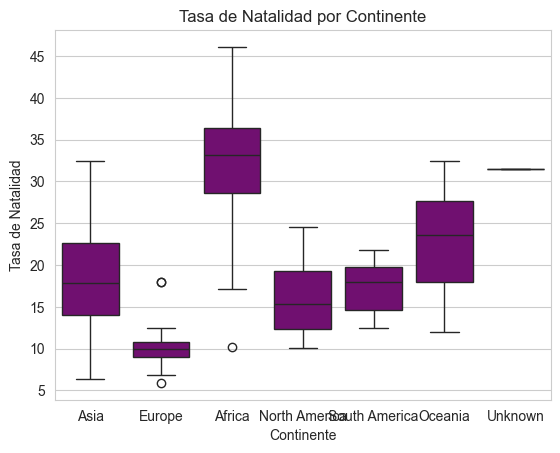

In [16]:
sns.boxplot(x='continent', y='birthrate', data=df_visualizacion, color="purple")

# Añadir etiquetas y título
plt.xlabel('Continente')
plt.ylabel('Tasa de Natalidad')
plt.title('Tasa de Natalidad por Continente')

# Mostrar el gráfico
plt.show()

8¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

In [17]:
df_visualizacion.columns

Index(['Unnamed: 0', 'country', 'density', 'abbreviation', 'agriculturalland',
       'landarea', 'armedforcessize', 'birthrate', 'callingcode',
       'capital/majorcity', 'co2-emissions', 'cpi', 'cpichange',
       'currency-code', 'fertilityrate', 'forestedarea', 'gasolineprice',
       'gdp', 'grossprimaryeducationenrollment',
       'grosstertiaryeducationenrollment', 'infantmortality', 'largestcity',
       'lifeexpectancy', 'maternalmortalityratio', 'minimumwage',
       'officiallanguage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')

In [19]:
df_visualizacion["cpi"].dtypes

dtype('float64')

In [21]:
filtrar = df_visualizacion[(df_visualizacion['cpi'] >= 100) & (df_visualizacion['cpi'] <= 300)]

Text(0, 0.5, 'Precio de la gasolina')

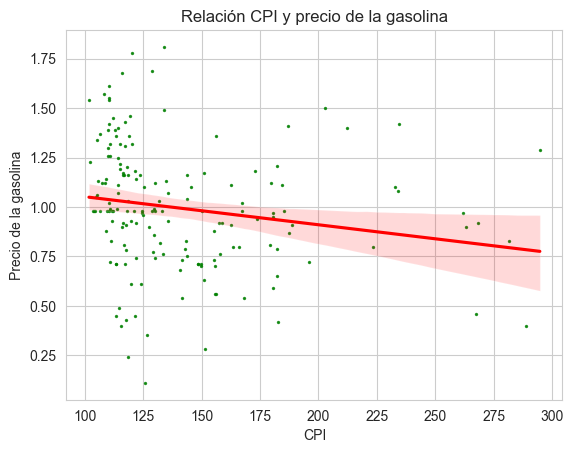

In [22]:
sns.regplot(x='cpi',y='gasolineprice', color="green", data=filtrar, scatter_kws={'s': 2},line_kws={'color': 'red'})
plt.ylabel('Precio de la gasolina')

plt.title('Relación CPI y precio de la gasolina')
plt.xlabel('CPI')
plt.ylabel('Precio de la gasolina')

9.¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

10.Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:

Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.

Un histograma de la tasa de impuestos total.

Un gráfico de barras que resuma la tasa de impuestos total por continente.